In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-pca/wine_pca.csv
/kaggle/input/crime-data/crime_data.csv


In [2]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
# PCA
from sklearn.decomposition import PCA

In [3]:
#importing Dataset
wine = pd.read_csv("../input/wine-pca/wine_pca.csv")


**EDA**

In [4]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
wine.shape

(178, 14)

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
#checking missing values
wine.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

**Data Visualisation**

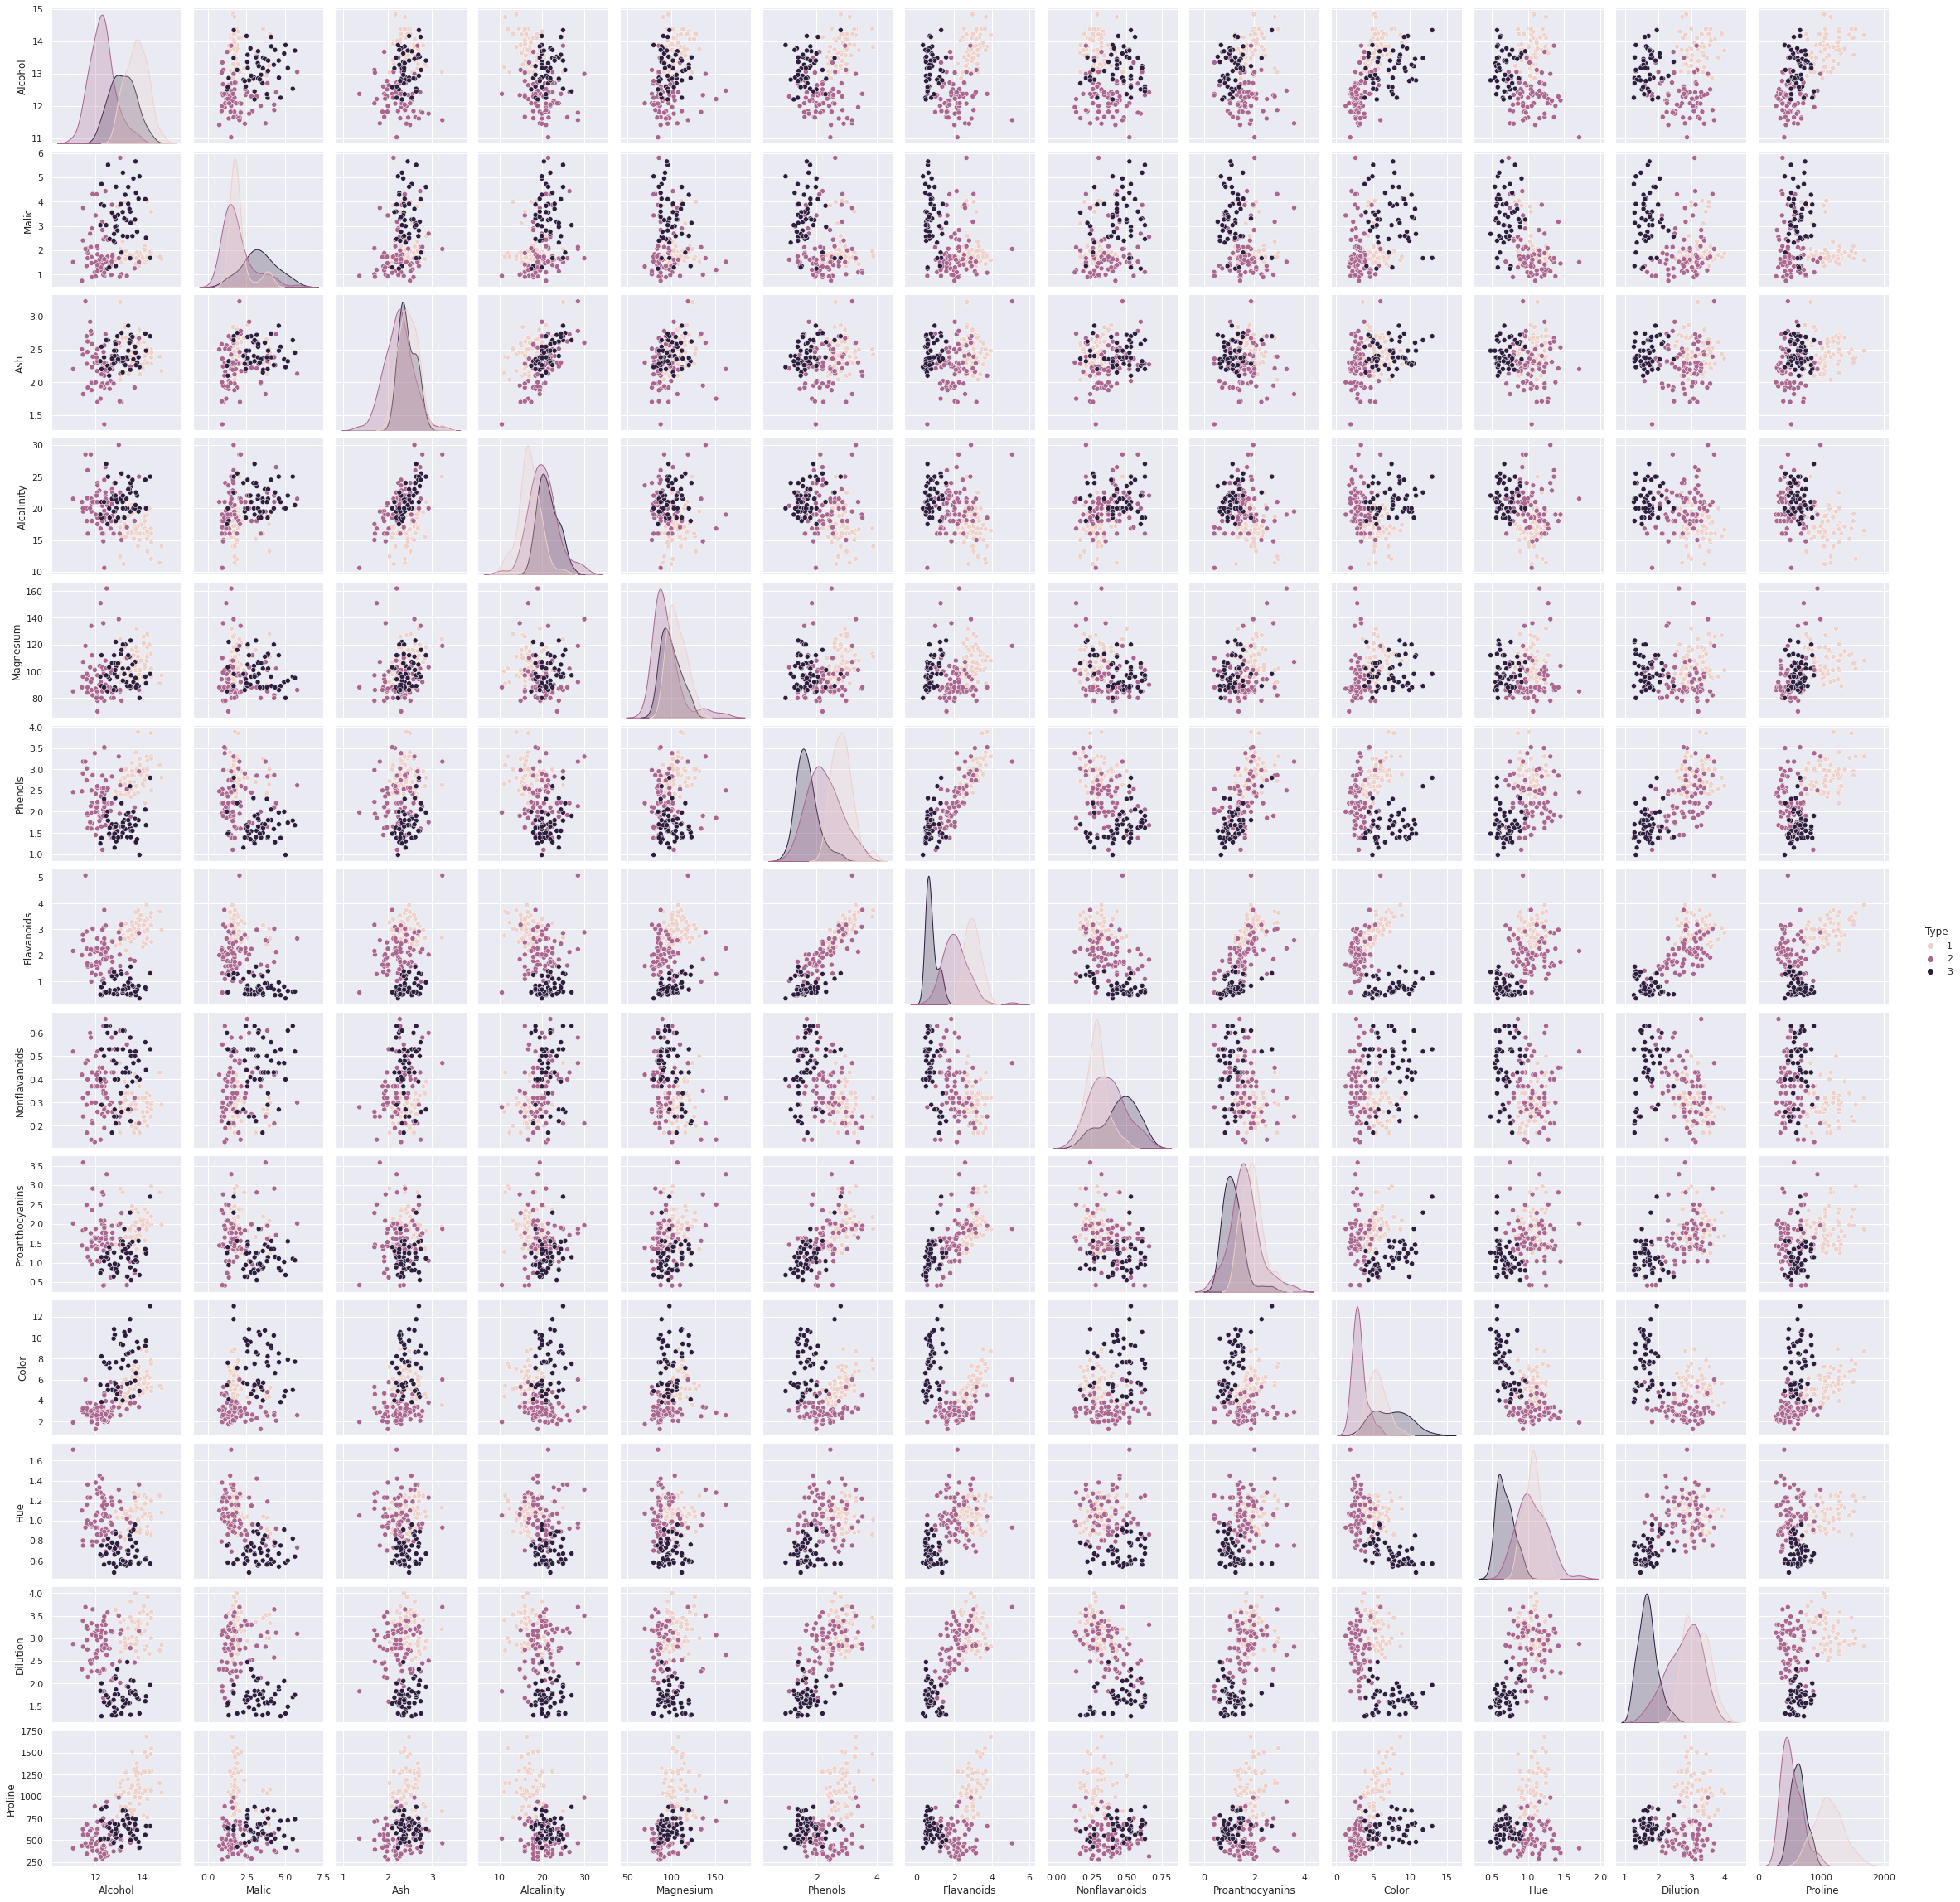

In [9]:
#it will show all data visualisation at once
#it will take little time to run
sns.pairplot(wine,hue='Type')

Standardising the data

In [10]:
scaler = StandardScaler()
scaled = scaler.fit_transform(wine)

**Clustering Before Dimension reduction(PCA)**

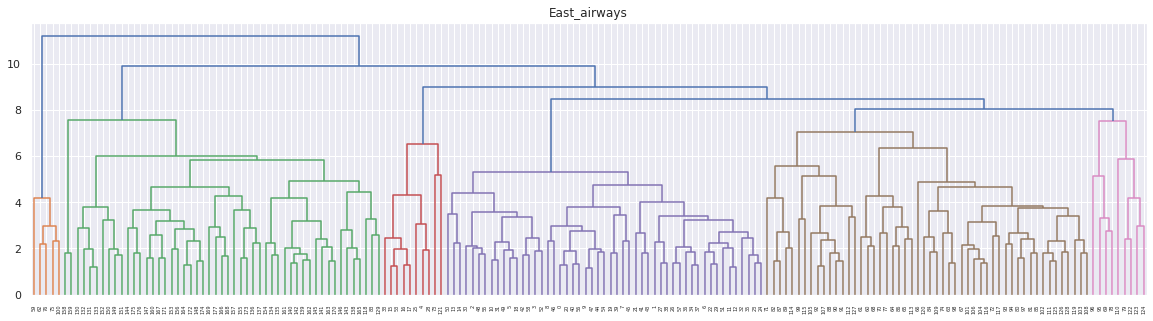

In [11]:
#Heirarchial clusterubg
#plotting the dendrogram
plt.figure(figsize=(20,5))
plt.title('East_airways')
dend = sch.dendrogram(sch.linkage(scaled, method='complete'))

In [12]:
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='complete')
y_pred_hie = agg_clustering.fit_predict(scaled)
print(y_pred_hie.shape)



(178,)


In [13]:
y_pred_hie

array([4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 3, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

**K-means**

In [14]:
from sklearn.cluster import KMeans
WSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled)
    WSS.append(kmeans.inertia_)

In [15]:
WSS

[1727.2286609320033,
 1285.562258740204,
 1182.7236590041286,
 1123.7058277369135,
 1065.2128365275116,
 1012.0474925056001,
 942.2651395371946]

Text(0, 0.5, 'total_within_SS')

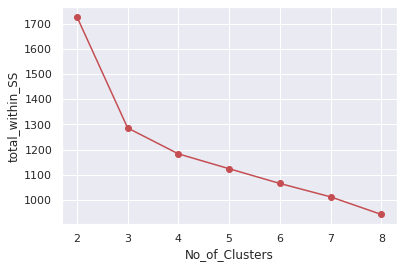

In [16]:
#screeplot
plt.plot(k, WSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")


In [17]:
#choosing the number of cluster from above plot
model = KMeans(n_clusters = 3)
model.fit(scaled)


KMeans(n_clusters=3)

In [18]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)

**Dimension reduction(PCA)**

In [19]:
#PCA
pca = PCA(n_components=14)
pca_values = pca.fit_transform(scaled)

In [20]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [21]:
# Cumulative variance 
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1


array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

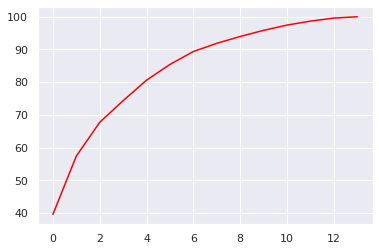

In [22]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

In [23]:
#pca Scores
pca_values

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

In [24]:
#converting into the dataframe
pca_data=  pd.DataFrame(pca_values)
#naming the columns 
pca_data.columns = "comp0", "comp1", "comp2","comp3","comp4","comp5","comp6","comp7","comp8","comp9","comp10","comp11","comp12","comp13"


In [25]:
#Taking only first three columns
pca_data_new = pca_data.iloc[:,0:3]

**Performing Clustering after PCA**

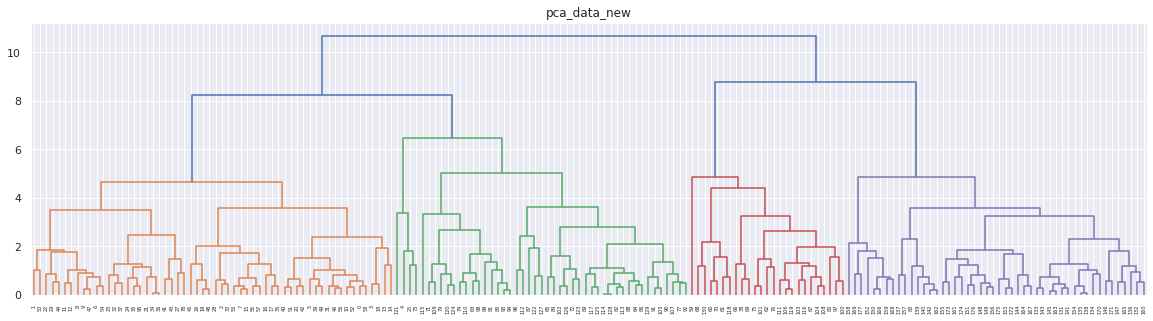

In [26]:
#clustering after pca
plt.figure(figsize=(20,5))
plt.title('pca_data_new')
dend = sch.dendrogram(sch.linkage(pca_data_new, method='complete'))
#you can compare it from the above dendrogram before PCA and after PCA

In [27]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete')
y_pred_hie1 = agg_clustering.fit_predict(pca_data_new)
print(y_pred_hie1.shape)
y_pred_hie1


(178,)


array([3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

**K-means after PCA**

In [28]:
WSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pca_data_new)
    WSS.append(kmeans.inertia_)

In [29]:
WSS

[925.0339289186145,
 491.2305709162671,
 407.34095937114887,
 355.78743635852584,
 315.7316769731085,
 278.47140056866476,
 251.15764915773426]

Text(0, 0.5, 'total_within_SS')

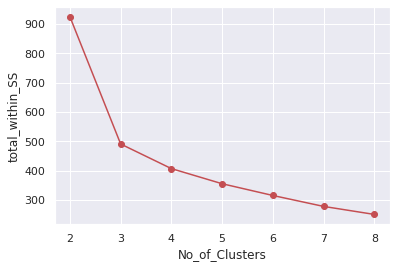

In [30]:
#screeplot
plt.plot(k, WSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")


In [31]:
model = KMeans(n_clusters = 3)
model.fit(pca_data_new)

KMeans(n_clusters=3)

In [32]:
model.labels_ # getting the labels of clusters assigned to each row 
mb1 = pd.Series(model.labels_)